In [2]:
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext
from pyspark import SQLContext
from pyspark.context import SparkContext
from pyspark.sql import SparkSession  #Main entry point for DataFrame and SQL functionality.
from pyspark.sql import DataFrame #A distributed collection of data grouped into named columns.
from pyspark.sql import Column #A column expression in a DataFrame.
from pyspark.sql import Row #A row of data in a DataFrame.
from pyspark.sql import GroupedData #Aggregation methods, returned by DataFrame.groupBy().
from pyspark.sql import DataFrameNaFunctions #Methods for handling missing data (null values).
from pyspark.sql import DataFrameStatFunctions #Methods for statistics functionality.
from pyspark.sql import functions #List of built-in functions available for DataFrame.
from pyspark.sql import types #List of data types available.
from pyspark.sql import Window #For working with window functions.
from pyspark import SparkConf
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType
from pyspark.sql.functions import explode
from pyspark.sql.functions import row_number, monotonically_increasing_id
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import when

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:120% !important; }</style>"))

In [3]:
%%time
np.random.seed(552)
Different_Language = np.random.choice([0, 1], size=1000000, p=[95/100, 5/100])
Different_Address = np.random.choice([0, 1], size=1000000, p=[95/100, 5/100])
Criminal_history = np.random.choice([0, 1], size=1000000, p=[95/100, 5/100])
Criminal_history[1:100]


Wall time: 114 ms


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Wall time: 360 ms


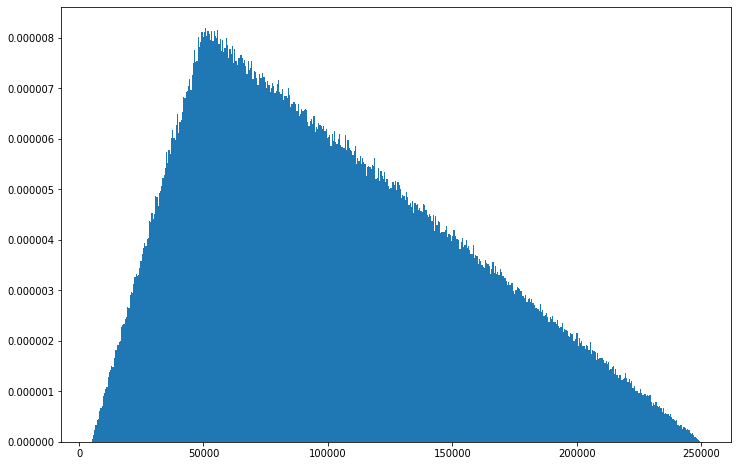

In [4]:
%%time
np.random.seed(552)
Income = np.random.triangular(5000, 50000, 250000, 1000000).astype(int)
Income
plt.figure(figsize=(12,8))
h = plt.hist(Income, bins=500, density=True)

In [5]:
%%time
np.random.seed(552)
Age_gap = np.random.triangular(0, 1, 30, 1000000).astype(int)
Number_of_children = np.random.triangular(0, 1, 7, 1000000).astype(int)
Number_of_divorce = np.random.triangular(0, 1, 6, 1000000).astype(int)



Wall time: 90 ms


In [7]:
%%time

numdivorce1 = Number_of_divorce.T
#print(numdivorce1[1:10])
numchild1 = Number_of_children.T
age_gap1 = Age_gap.T
income1 = Income.T
Diff_Language1 = Different_Language.T
Diff_Address1 = Different_Address.T
Criminal_history1 = Criminal_history.T


Wall time: 0 ns


In [8]:
appName = "Data Generator"
master = "local"

# Create Spark session
spark = SparkSession.builder \
    .appName(appName) \
    .master(master) \
    .getOrCreate()

In [9]:
%%time
#data = [("Income", Income), ("Age_gap", Age_gap), ("Number_of_children", Number_of_children), ("Number_of_divorce", Number_of_divorce)] 
#data = [Income.tolist(), Age_gap.tolist(), Number_of_children.tolist(), Number_of_divorce.tolist()] 
data = [age_gap1.tolist(), income1.tolist(), numchild1.tolist(), numdivorce1.tolist(), Diff_Language1.tolist(), \
Diff_Address1.tolist(), Criminal_history1.tolist()]


Wall time: 85 ms


In [10]:
%%time
# Create a schema for the dataframe
schema = StructType([
    StructField('Age_gap', ArrayType(IntegerType(), True), True),
    StructField('Income', ArrayType(IntegerType(), True), True),
    StructField('Number_of_children', ArrayType(IntegerType(), True), True),
    StructField('Number_of_divorce', ArrayType(IntegerType(), True), True),
    StructField('Different_Language', ArrayType(IntegerType(), True), True),
    StructField('Different_Address', ArrayType(IntegerType(), True), True),
    StructField('Criminal_history', ArrayType(IntegerType(), True), True),
])

# Convert list to RDD
rdd = spark.sparkContext.parallelize([data])
print(rdd)

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195
Wall time: 651 ms


In [11]:
%%time
# Create data frame
df = spark.createDataFrame(rdd,schema)
df.printSchema()
df.show()

root
 |-- Age_gap: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Income: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Number_of_children: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Number_of_divorce: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Different_Language: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Different_Address: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Criminal_history: array (nullable = true)
 |    |-- element: integer (containsNull = true)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|             Age_gap|              Income|  Number_of_children|   Number_of_divorce|  Different_Language|   Different_Address|    Criminal_history|
+--------------------+---------------

In [12]:
%%time
from pyspark.sql.functions import explode
df2 = df.select(explode(df.Age_gap).alias("Age_gap"))
#df2.show(10)
df3 = df.select(explode(df.Income).alias("Income"))
#df3.show(10)
df4 = df.select(explode(df.Number_of_children).alias("Number_of_children"))
#df4.show(10)
df5 = df.select(explode(df.Number_of_divorce).alias("Number_of_divorce"))
#df5.show(10)
df6 = df.select(explode(df.Different_Language).alias("Different_Language"))
#df6.show(10)
df7 = df.select(explode(df.Different_Address).alias("Different_Address"))
#df7.show(10)
df8 = df.select(explode(df.Criminal_history).alias("Criminal_history"))
df8.show(10)



+----------------+
|Criminal_history|
+----------------+
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
+----------------+
only showing top 10 rows

Wall time: 18.8 s


In [13]:
%%time
from pyspark.sql.functions import row_number, monotonically_increasing_id
#Add column "id" for joining
df2 = df2.withColumn("id", monotonically_increasing_id())
df3 = df3.withColumn("id", monotonically_increasing_id())
df4 = df4.withColumn("id", monotonically_increasing_id())
df5 = df5.withColumn("id", monotonically_increasing_id())
df6 = df6.withColumn("id", monotonically_increasing_id())
df7 = df7.withColumn("id", monotonically_increasing_id())
df8 = df8.withColumn("id", monotonically_increasing_id())

df8.show(10)



+----------------+---+
|Criminal_history| id|
+----------------+---+
|               0|  0|
|               0|  1|
|               0|  2|
|               0|  3|
|               0|  4|
|               0|  5|
|               0|  6|
|               0|  7|
|               0|  8|
|               0|  9|
+----------------+---+
only showing top 10 rows

Wall time: 20 s


In [14]:
%%time
merged_df =df2.join(df3,["id"]).join(df4, ["id"]).join(df5, ["id"]).join(df6,["id"]).join(df7, ["id"]).join(df8, ["id"])

#merged_df.sort("id").show(100) 


Wall time: 95 ms


In [15]:
%%time
from pyspark.sql.functions import when
#set conditions for Fraud with new columns
marriage_df = merged_df.withColumn("Big_age_gap", when((merged_df.Age_gap > 20), lit("1")).otherwise(lit("0"))). \
                        withColumn("Too_many_children", when((merged_df.Number_of_children > 5), lit("1")).otherwise(lit("0"))). \
                        withColumn("Too_many_divorce", when((merged_df.Number_of_divorce > 4), lit("1")).otherwise(lit("0"))). \
                        withColumn("Too_low_income", when((merged_df.Income < 15000), lit("1")).otherwise(lit("0")))

#Aggregate selected indicators for fraud
marriage_df = marriage_df.withColumn("Indicator_Sum", col("Different_Language") + col("Different_Address") + \
                                              col("Criminal_history") + col("Big_age_gap")  + \
                                              col("Too_many_children") + col("Too_many_divorce") + col("Too_low_income")) 

marriage_df = marriage_df.withColumn("Fraud_Alert", when((marriage_df.Indicator_Sum >= 2), lit("1")).otherwise(lit("0")))

marriage_df = marriage_df.sort("id")


Wall time: 663 ms


In [16]:
%%time
marriage_df.sort("id").show(30)


+---+-------+------+------------------+-----------------+------------------+-----------------+----------------+-----------+-----------------+----------------+--------------+-------------+-----------+
| id|Age_gap|Income|Number_of_children|Number_of_divorce|Different_Language|Different_Address|Criminal_history|Big_age_gap|Too_many_children|Too_many_divorce|Too_low_income|Indicator_Sum|Fraud_Alert|
+---+-------+------+------------------+-----------------+------------------+-----------------+----------------+-----------+-----------------+----------------+--------------+-------------+-----------+
|  0|      1| 30578|                 0|                4|                 0|                0|               0|          0|                0|               0|             0|          0.0|          0|
|  1|      6| 76397|                 3|                1|                 0|                0|               0|          0|                0|               0|             0|          0.0|          0|


In [17]:
%%time
# find sum of subjects column
marriage_df.agg({'Fraud_Alert': 'sum'}).show()



+----------------+
|sum(Fraud_Alert)|
+----------------+
|        106063.0|
+----------------+

Wall time: 4min 9s


In [ ]:
%%time
path1 = "C:\\Users\\knguye29\\Desktop\\ECE552\\Finalproject\\marriage_fraud_dataset"

marriage_df.write.parquet(path1)

In [ ]:
%%time

#marriage_df.write.option("header",True).csv("C:\\Users\\knguye29\\Desktop\\ECE552\\Finalproject\\marriage_data.csv")
#marriage_df.write.format("csv").save("C:\\Users\\knguye29\\Desktop\\ECE552\\Finalproject\\marriage_data.csv")
path = "marriage_fraud_dataset"

marriage_df.write.parquet(path)

In [1]:
'''
%%time
#Creating Table

spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)
#marriage_df.registerTempTable('MarriageFraudTable')
#Running Query
df1 = sqlContext.sql("SELECT * from MarriageFraudTable").toPandas()
df2 = sqlContext.sql("SELECT Number_of_children from MarriageFraudTable where Fraud_Alert == 1").toPandas()
#Creating Visualization
fig = plt.pie(df2['Number_of_children'], autopct='%1.1f%%', startangle=140,labels=df2['Number_of_children'])
plt.title('Distribution of Fraud base on Number of Children')
plt.show()
'''

'\n%%time\n#Creating Table\n\nspark = SparkSession.builder.getOrCreate()\nsqlContext = SQLContext(spark)\n#marriage_df.registerTempTable(\'MarriageFraudTable\')\n#Running Query\ndf1 = sqlContext.sql("SELECT * from MarriageFraudTable").toPandas()\ndf2 = sqlContext.sql("SELECT Number_of_children from MarriageFraudTable where Fraud_Alert == 1").toPandas()\n#Creating Visualization\nfig = plt.pie(df2[\'Number_of_children\'], autopct=\'%1.1f%%\', startangle=140,labels=df2[\'Number_of_children\'])\nplt.title(\'Distribution of Fraud base on Number of Children\')\nplt.show()\n'